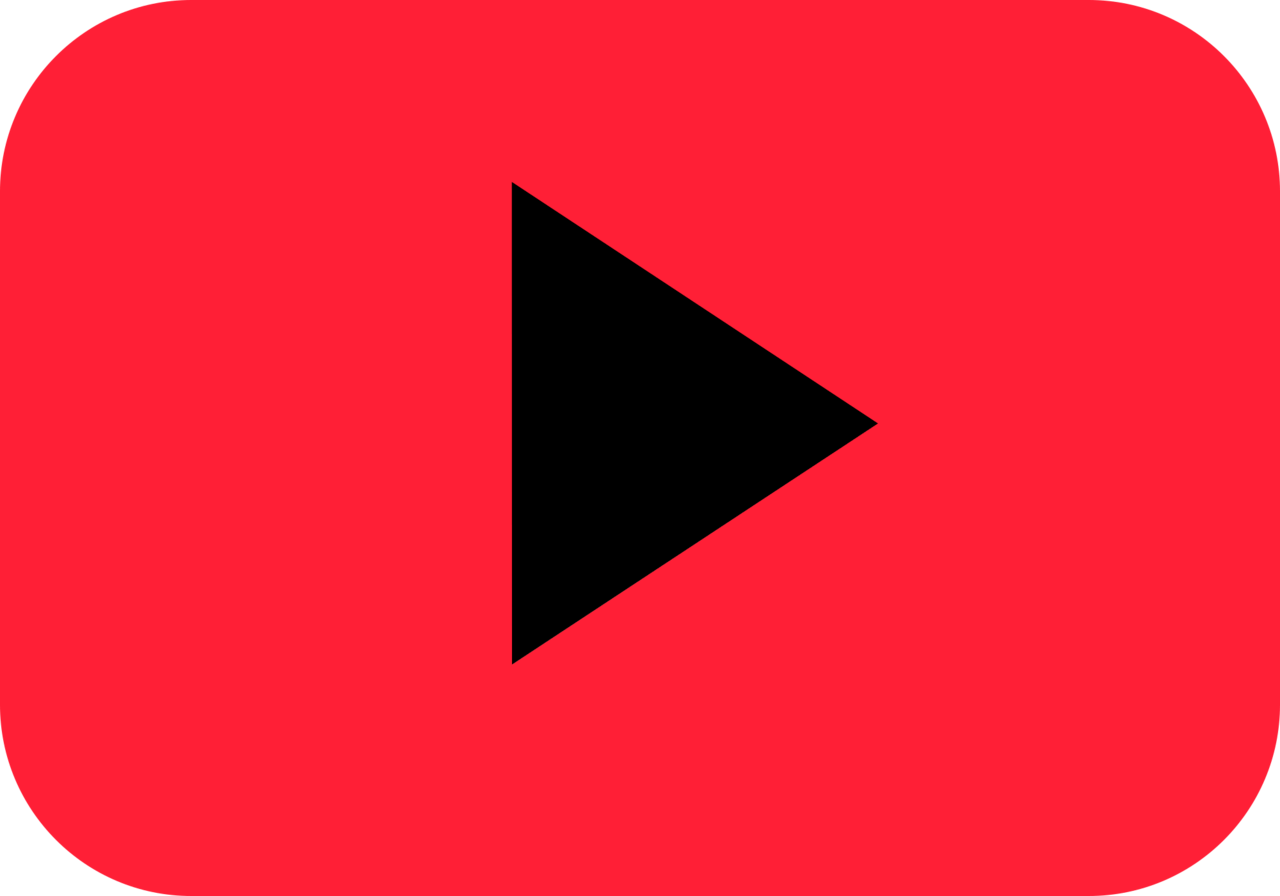
        Who doesn't like movies, I also like me, this is my way to present it with you..

First, I would like to shoutout for the following kernels, from which the below analysis was inspired

https://www.kaggle.com/nishadjoshi98/visualization-analysis-and-recommendation-system

https://www.kaggle.com/tanishqbhatia/data-analytics-on-movies-on-online-platforms

Thanks a lot!

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#import the libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series

%matplotlib inline
pd.set_option('display.max_rows', 500)

# Data Cleaning

In [ ]:
movies = pd.read_csv('/kaggle/input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms_updated.csv', index_col='ID')
#found a way to remove the annoying 'Unnamed: 0'
movies = movies.drop('Unnamed: 0', axis =1)
movies.head()

So, I found a way to dealing with the annoying 'Unnamed: 0' coloum,Yay! now lets write a quick function to investigate the data

In [ ]:
#function to investigate the data

def data_inv(df):
    print('No of Rows: ', df.shape[0])
    print('No of Coloums: ', df.shape[1])
    print('**'*25)
    print('Colums Names: \n', df.columns)
    print('**'*25)
    print('Datatype of Columns: \n', df.dtypes)
    print('**'*25)
    print('Missing Values: ')
    c = df.isnull().sum()
    c = c[c>0]
    print(c)
    print('**'*25)
    print('Missing vaules %age wise:\n')
    print((100*(df.isnull().sum()/len(df.index))))
    print('**'*25)
    print('Pictorial Representation:')
    plt.figure(figsize=(8,6))
    sns.heatmap(df.isnull(), yticklabels=False,cbar=False)
    plt.show()  


In [ ]:
data_inv(movies)

It seems I am getting to much attached to the data, so I'll drop rotten Tomatoes first

In [ ]:
movies.drop(['Rotten Tomatoes', 'Age'], axis = 1, inplace=True)

In [ ]:
data_inv(movies)

Now I plan to drop the rows that has the IMDB column as empty

In [ ]:
movies.dropna(subset=['IMDb'], inplace=True)

In [ ]:
data_inv(movies)

Doing the same with columns such as directors, genres,country, language & runtime

In [ ]:
movies.dropna(subset=['Directors', 'Genres', 'Country', 'Language', 'Runtime'],inplace=True)
data_inv(movies)

Cool the data is cleaned & ready to study... :)

# Data Analysis

## Univarate Analysis

In [ ]:
movies.head()

In [ ]:
movies.shape

In [ ]:
#checking for any duplicate data
movies.drop_duplicates(inplace=True)

In [ ]:
#lets check out the unique values in first Column
movies['Title'].value_counts()

_The tittles are fine & unique_

In [ ]:
#checking years
plt.figure(figsize=(10,10))
sns.distplot(movies['Year'])
plt.show()

_So we have movies starting from 1900, but mostly the data is from 2000 onwards_

In [ ]:
#Writing a function to calculate the movies in different platforms
def movies_count(platform, count=False):
    if count==False:
        print('Movies in {} are {}'. format(platform, movies[platform].sum()))
    else:
        return movies[platform].sum()
    

In [ ]:
movies['IMDb']

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(movies['IMDb'])
#plt.hist(movies['IMDb'])
plt.show()

In [ ]:
print('Minimum IMDb rating: ', movies['IMDb'].min())
print('Maximum IMDb rating: ', movies['IMDb'].max())

In [ ]:
movies_count('Netflix')
movies_count('Hulu')
movies_count('Prime Video')
movies_count('Disney+')

In [ ]:
#Movies per platform
labels = 'Netflix', 'Hulu', 'Prime Video', 'Disney'
size = [movies_count('Netflix', count=True), 
        movies_count('Hulu', count=True),
        movies_count('Prime Video', count=True),
        movies_count('Disney+', count=True)]

explode = (0.1, 0.1, 0.1, 0.1)

#plotting
fig1, ax1 = plt.subplots()

ax1.pie(size,
       labels = labels,
       autopct = '%1.1f%%',
       explode = explode,
       shadow = True,
       startangle = 100)

ax1.axis = ('equal')
plt.show()

So, Prime Vides is hosting the maximum number of titles, but its to note that on add the count (3152+ 848+11289+542), we get **15831**, which means _that there are **598** movies that are present in more than one platform._

In [ ]:
movies['Type'].value_counts()

**Type** Column has all zero values, so deciding to drop this.

In [ ]:
movies.drop('Type', inplace=True, axis =1)
movies.shape

In [ ]:
movies['Directors'].value_counts()

In [ ]:
s = movies['Directors'].str.split(',').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Directors'
del movies['Directors']
df_directors = movies.join(s)

Directors: Directors, in this column, some directors are present with a ',' so I'll split the names by ',' & then stack it one after the other for easy analysis. Then I wanted to find the director which has the maximum number of movies, to accomplish this, I have set a threshold (10) & plotted the directors which directed more than 10 movies.

In [ ]:
data = df_directors['Directors'].value_counts()
threshold = 10
prob = data > threshold
data_new = data.loc[prob]

plt.figure(figsize=(10,10))
data_new.plot(kind='bar')
plt.show()

In [ ]:
s = movies['Genres'].str.split(',').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Genres'
del movies['Genres']
df_genres = movies.join(s)

In [ ]:
df_genres.head()

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='Genres', data=df_genres)
plt.xticks(rotation=90)
plt.show()

In [ ]:
s = movies['Country'].str.split(',').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Country'
del movies['Country']
df_country = movies.join(s)

In [ ]:
df_country['Country'].value_counts()[:10].plot(kind='bar')
plt.show()

In [ ]:
s = movies['Language'].str.split(',').apply(Series,1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Language'
del movies['Language']
df_language = movies.join(s)

In [ ]:
df_language['Language'].value_counts()[:10].plot(kind='barh')
plt.show()

In [ ]:
sns.distplot(movies['Runtime'])
plt.show()

So average movie runtime is between 100~120

In [ ]:
filter =( movies['Runtime'] == (movies['Runtime'].max()))
movies[filter]

That is a very long movie

In [ ]:
filter =( movies['Runtime'] == (movies['Runtime'].min()))
movies[filter]

Movies can't be for 1.0 min, google shows that this movie is close to 1:54 mins, so there is some data quality issue.

In [ ]:
#top rated movie
filter =( movies['IMDb'] == (movies['IMDb'].max()))
movies[filter]

In [ ]:
# Bottom Rated movie
filter =( movies['IMDb'] == (movies['IMDb'].min()))
movies[filter]

## All Code Ends Here!

##### But not for long :)

